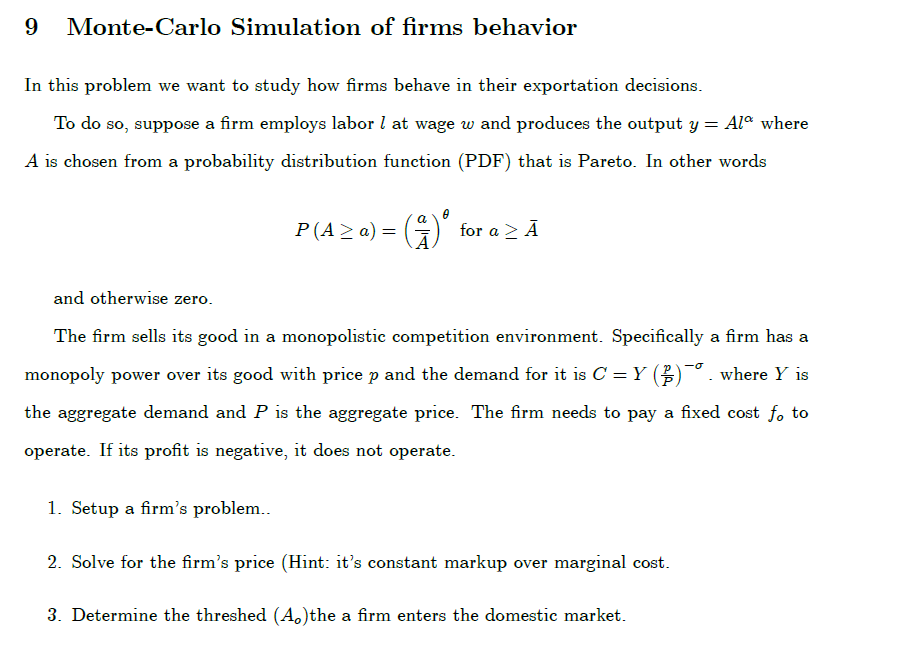

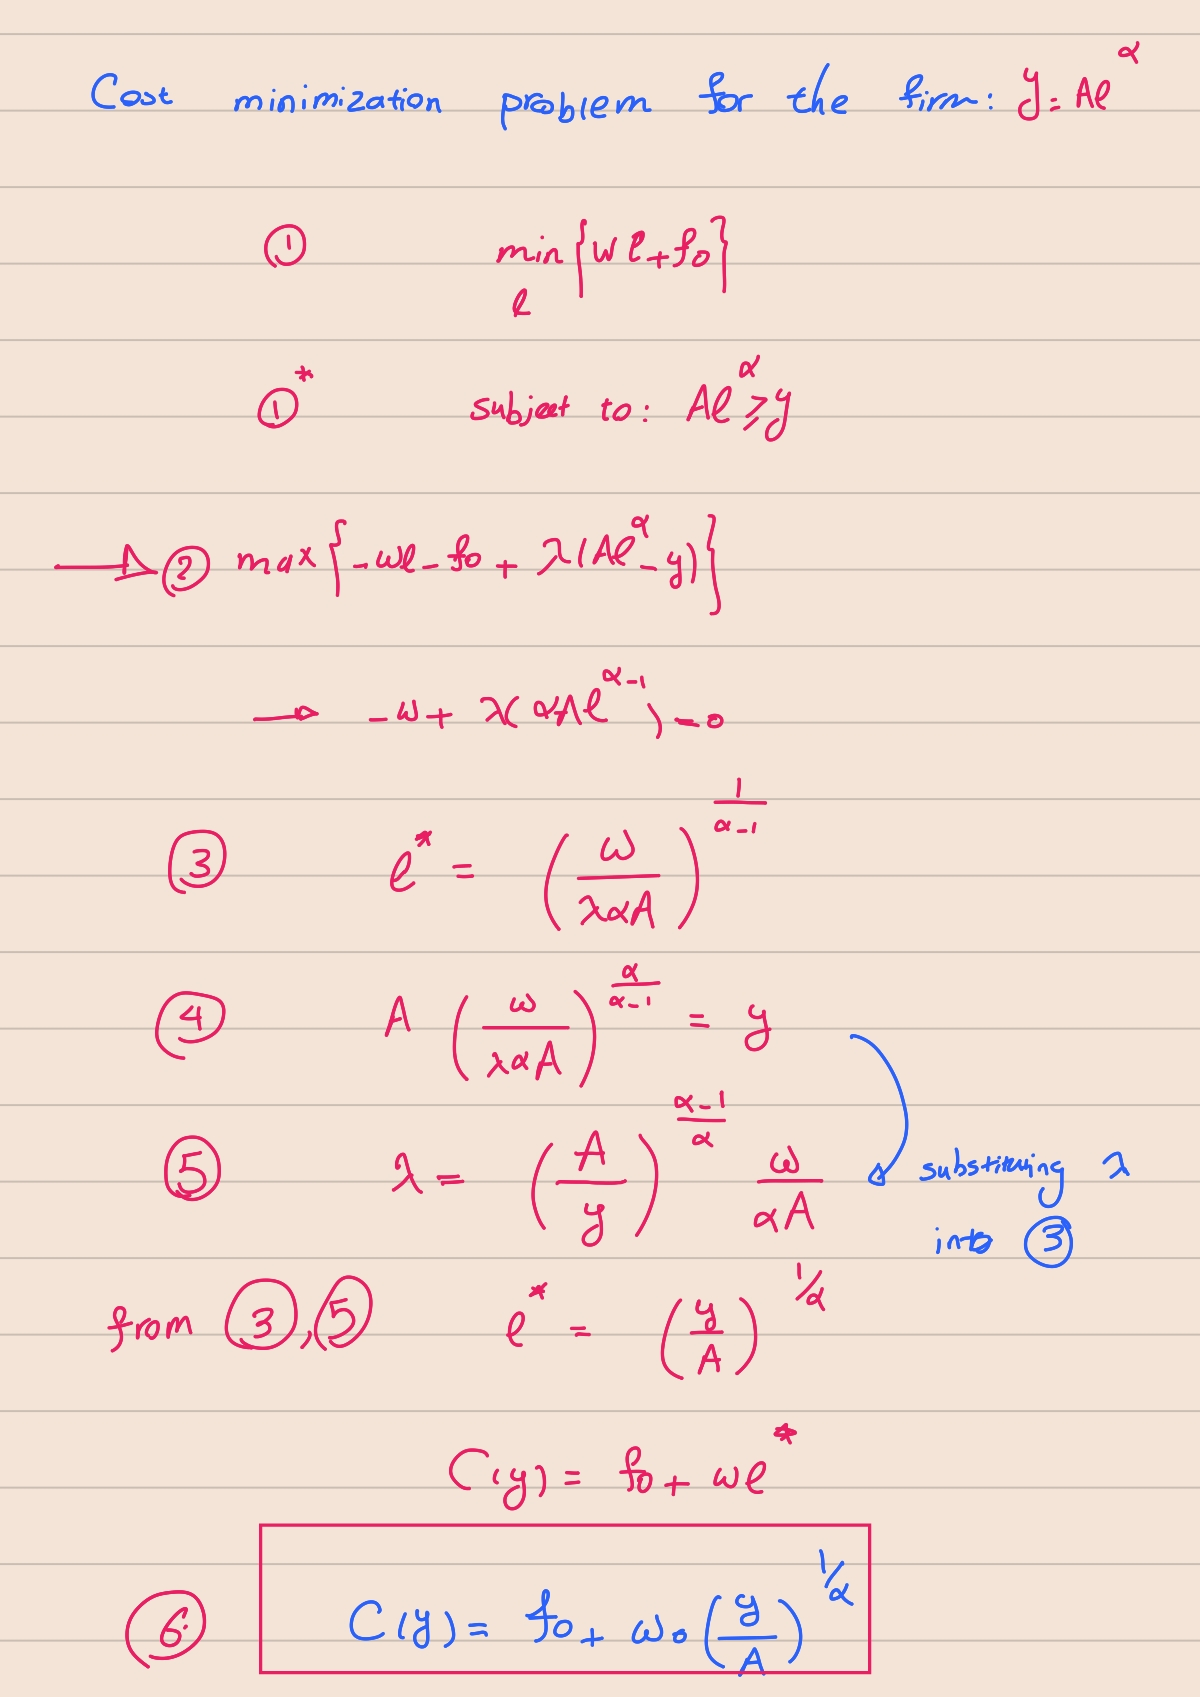


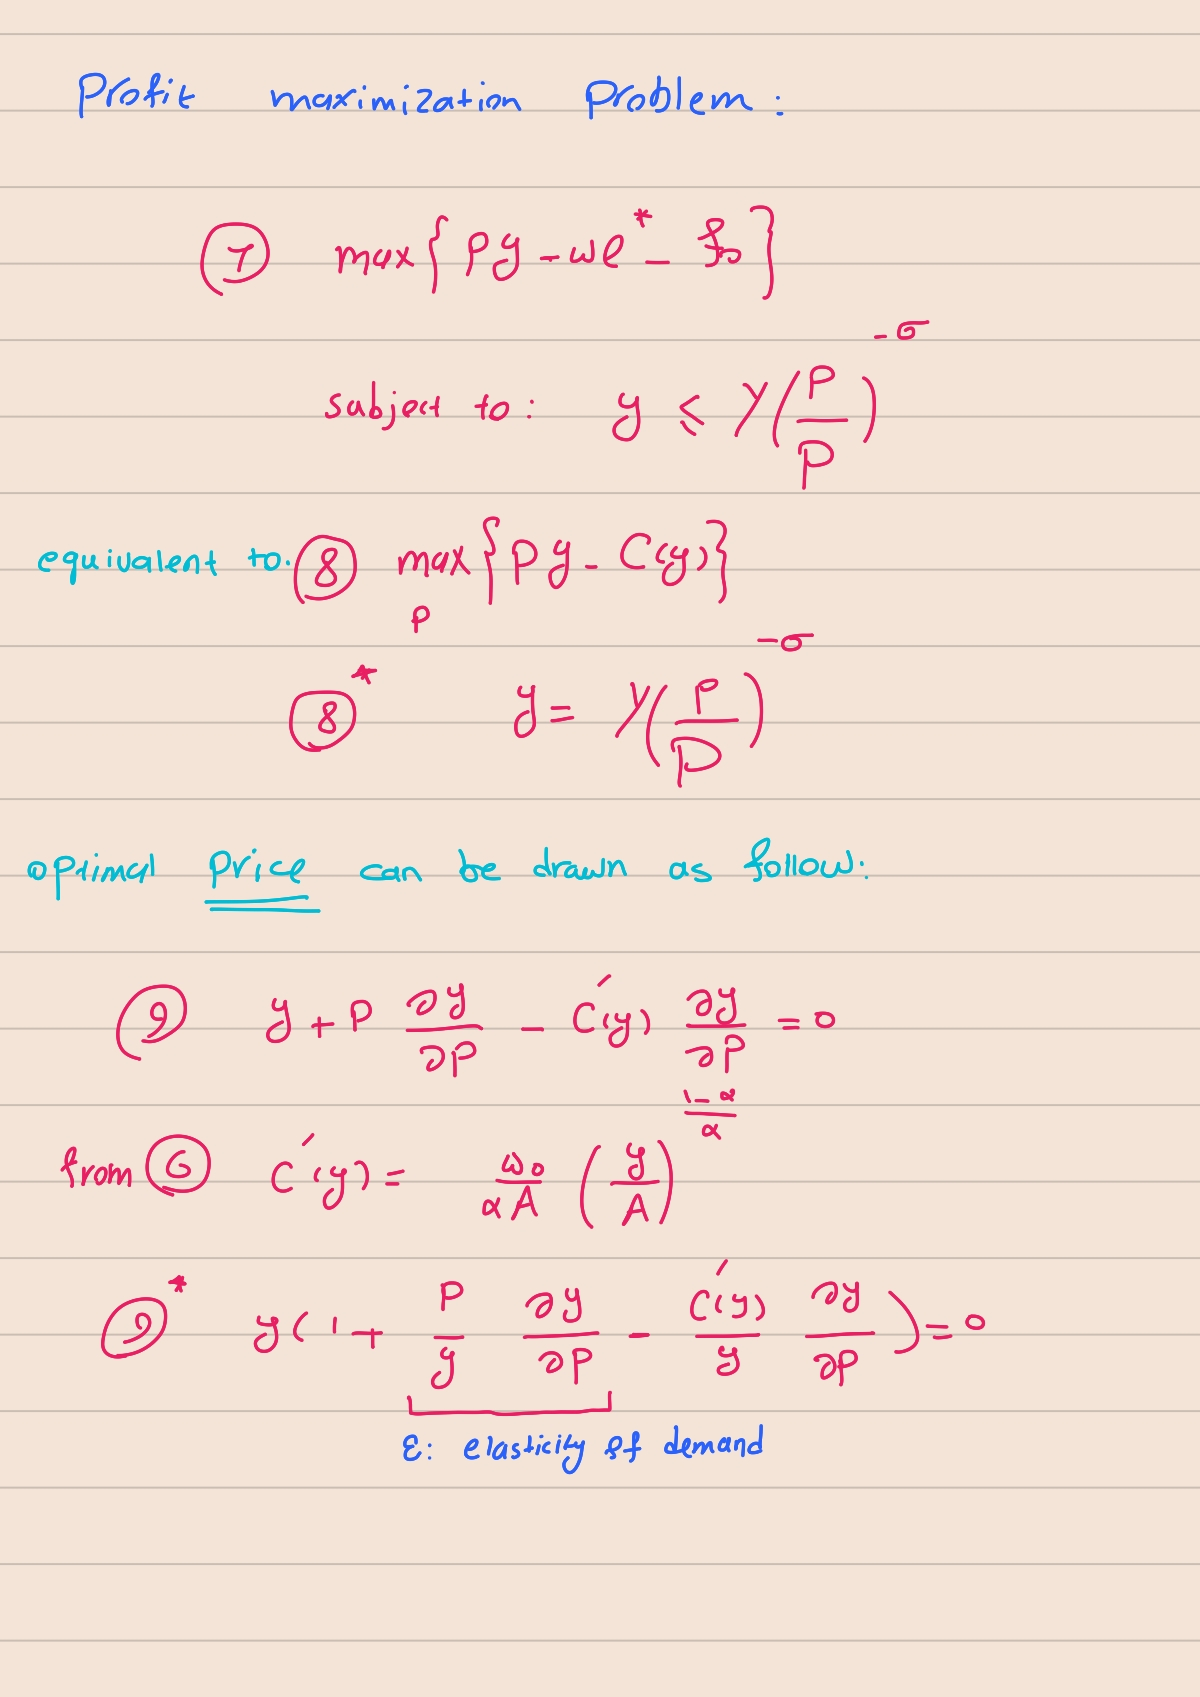

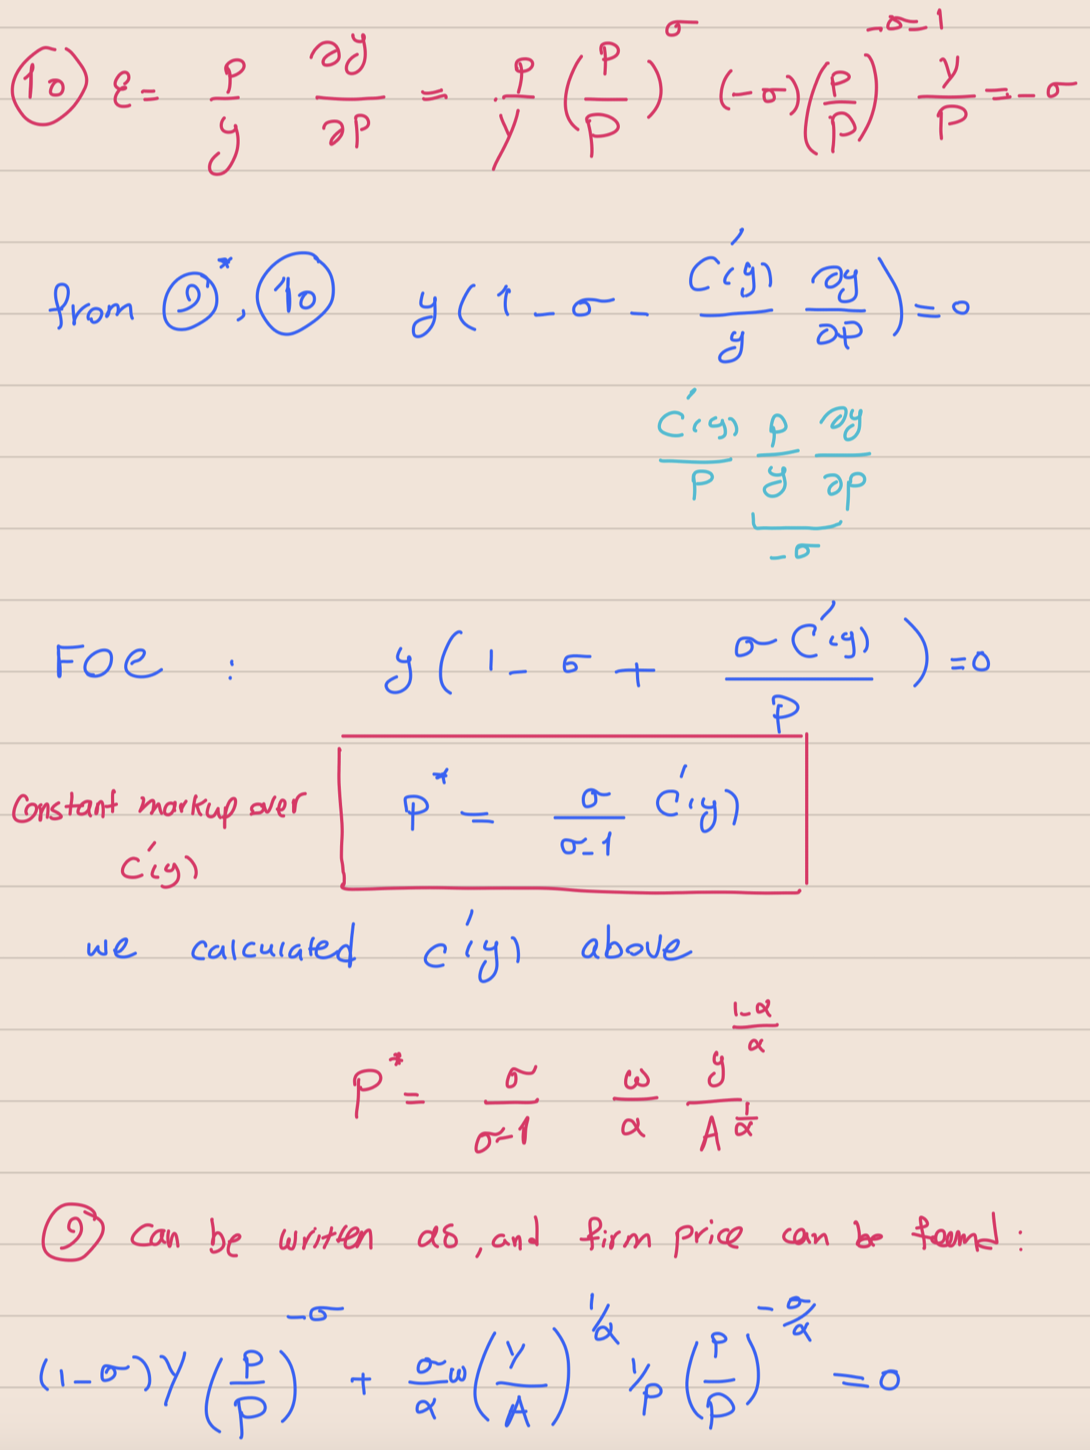

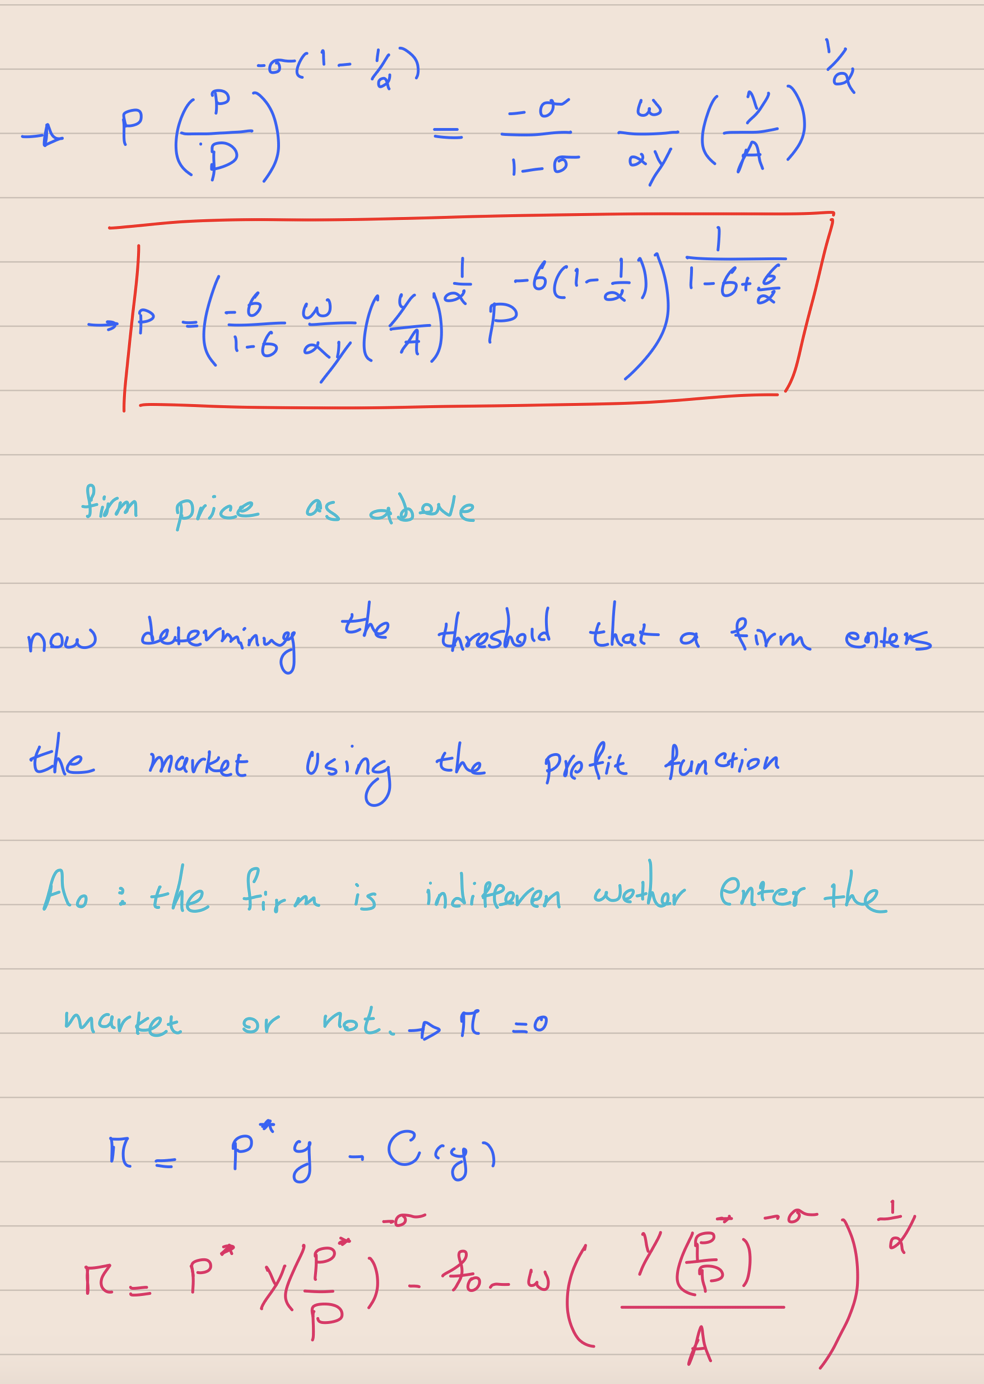

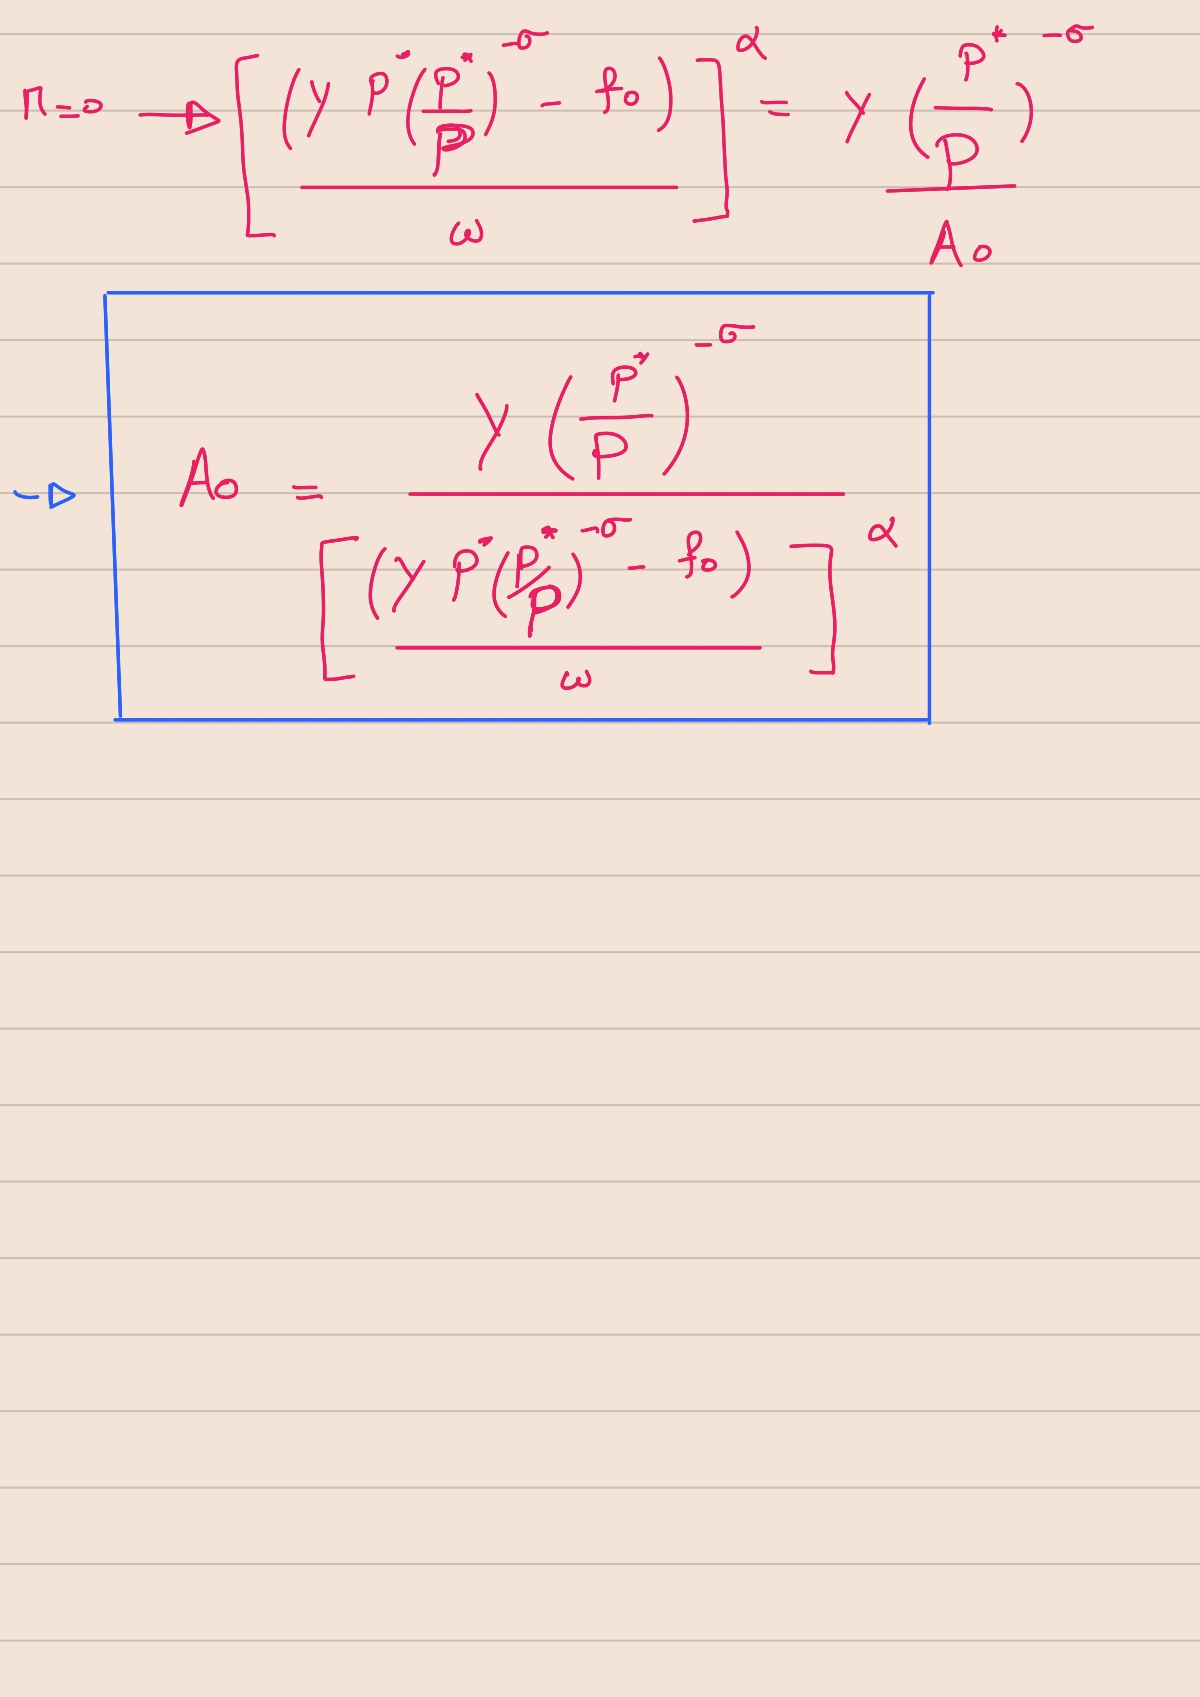

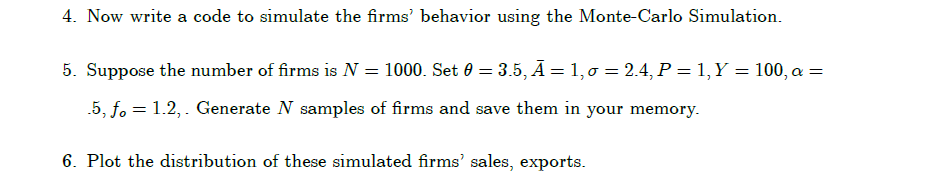

In [1]:
#Required Packages
from scipy.optimize import minimize_scalar
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Seeding the random number generator for reproducibility
np.random.seed(1402)

# Parameters
N = 1000
w = 10
theta = 3.5
A_bar = 1
sigma = 2.4
P = 1
Y = 100
alpha = 0.5
f_0 = 1.2

# Generating Pareto-distributed samples for A
A = (np.random.pareto(theta, N) + 1 ) * A_bar

# Initial arrays
price_list = np.zeros(N)
labor_list = np.zeros(N)
output_list = np.zeros(N)
profit_list = np.zeros(N)

In [3]:
def neg_profit(p, A_i):
    return -p * Y * (p / P) ** (-sigma) + f_0 + w * ((Y * (p / P) ** (-sigma)) / A_i) ** (1 / alpha)

for i in range(N):
    # res = minimize_scalar(neg_profit, bounds=(0, 100), args=(A[i]), method='bounded')
    # price_list[i] = res.x
    price_list[i] = (-sigma/(1-sigma)*w/(alpha*Y)*(Y/A[i])**(1/alpha)*P**(-sigma*(1-1/alpha)))**(1/(1-sigma+sigma/alpha))
    output_list[i] = Y * (price_list[i] / P) ** (-sigma)
    labor_list[i] = (output_list[i] / A[i]) ** (1 / alpha)
    profit_list[i] = - neg_profit(price_list[i], A[i])
    if profit_list[i] < 0:
        output_list[i], labor_list[i], profit_list[i] = 0, 0, 0
sales = output_list * price_list

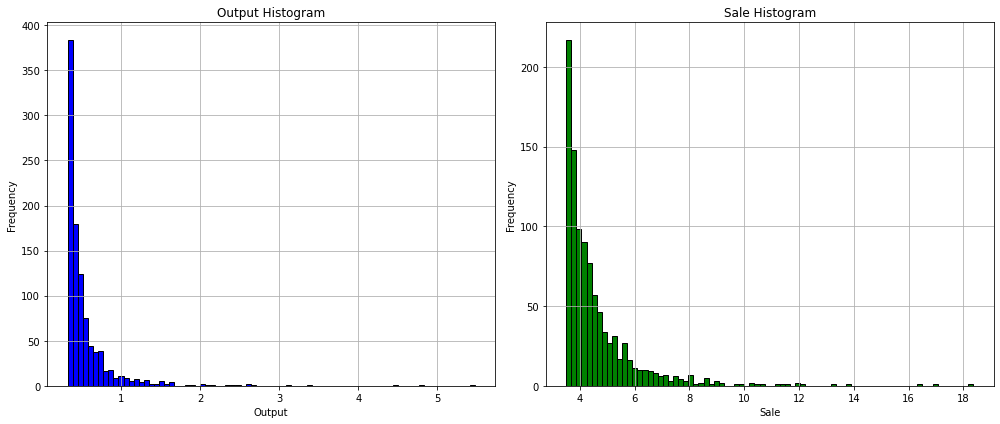

In [5]:
# Plotting histograms for the output and sale distributions
plt.figure(figsize=(14, 6))

# Output Histogram
plt.subplot(1, 2, 1)
plt.hist(output_list[output_list > 0], bins=80, color='blue', edgecolor='black')  # Only consider positive outputs
plt.title('Output Histogram')
plt.xlabel('Output')
plt.ylabel('Frequency')
plt.grid(True) 
# Sale Histogram
plt.subplot(1, 2, 2)
plt.hist(sales[sales > 0], bins=80, color='green', edgecolor='black')  # Only consider positive sales
plt.title('Sale Histogram')
plt.xlabel('Sale')
plt.ylabel('Frequency')
plt.grid(True) 

# Show the histograms
plt.tight_layout()
plt.show()
